# Import Libraries 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight
import warnings

warnings.filterwarnings('ignore')

### 

# Data Collection & Analysis

In [4]:
train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')

In [5]:
train_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,70.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,3.0,1.8,95.0,1.00,95.0,0
1,78.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.9,1.7,104.0,0.76,137.0,0
2,50.0,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,3.0,0.0,106.0,1.07,99.0,0
3,44.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.2,1.7,92.0,0.98,94.0,0
4,64.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,2.2,0.0,111.0,0.97,114.0,0


In [6]:
test_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,60.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.48,1.7,88.0,0.83,105.0,0
1,53.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.00,0.0,78.0,0.85,91.0,0
2,77.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.10,1.9,100.0,0.98,102.0,0
3,69.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.10,0.0,110.0,1.02,108.0,0
4,89.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,1.5,120.0,0.92,130.0,0


In [7]:
train_data.shape

(5356, 22)

In [8]:
test_data.shape

(1786, 22)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5356 non-null   float64
 1   sex                  5356 non-null   float64
 2   on_thyroxine         5356 non-null   int64  
 3   query_on_thyroxine   5356 non-null   int64  
 4   on_antithyroid_meds  5356 non-null   int64  
 5   sick                 5356 non-null   int64  
 6   pregnant             5356 non-null   int64  
 7   thyroid_surgery      5356 non-null   int64  
 8   I131_treatment       5356 non-null   int64  
 9   query_hypothyroid    5356 non-null   int64  
 10  query_hyperthyroid   5356 non-null   int64  
 11  lithium              5356 non-null   int64  
 12  goitre               5356 non-null   int64  
 13  tumor                5356 non-null   int64  
 14  hypopituitary        5356 non-null   int64  
 15  psych                5356 non-null   i

In [10]:
train_data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5356.0,52.221621,18.489727,1.0,38.00,55.00,67.00,97.00
sex,5356.0,0.640777,0.479818,0.0,0.00,1.00,1.00,1.00
on_thyroxine,5356.0,0.111837,0.315195,0.0,0.00,0.00,0.00,1.00
query_on_thyroxine,5356.0,0.018857,0.136034,0.0,0.00,0.00,0.00,1.00
on_antithyroid_meds,5356.0,0.013256,0.114380,0.0,0.00,0.00,0.00,1.00
sick,5356.0,0.035661,0.185461,0.0,0.00,0.00,0.00,1.00
pregnant,5356.0,0.002801,0.052851,0.0,0.00,0.00,0.00,1.00
thyroid_surgery,5356.0,0.014376,0.119048,0.0,0.00,0.00,0.00,1.00
I131_treatment,5356.0,0.019417,0.138000,0.0,0.00,0.00,0.00,1.00
query_hypothyroid,5356.0,0.066654,0.249445,0.0,0.00,0.00,0.00,1.00


In [12]:
train_data.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
target                 0
dtype: int64

In [13]:
train_data.target.value_counts()

target
0    4788
1     437
2     131
Name: count, dtype: int64

### 

# Separating Features & Target variable


### Training

In [14]:
X_train = train_data.drop(['target'], axis=1).copy()
y_train = train_data['target'].copy()

### Testing

In [15]:
X_test = test_data.drop(['target'], axis=1).copy()
y_test = test_data['target'].copy()

In [16]:
X_train.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,70.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,1.8,95.0,1.00,95.0
1,78.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.9,1.7,104.0,0.76,137.0
2,50.0,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,3.0,0.0,106.0,1.07,99.0
3,44.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.2,1.7,92.0,0.98,94.0
4,64.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2.2,0.0,111.0,0.97,114.0


In [17]:
X_train.shape,y_train.shape

((5356, 21), (5356,))

In [18]:
X_test.shape,y_test.shape

((1786, 21), (1786,))

### 

# Model Training

### Using XGBClassifier

In [1]:
import sklearn
print(sklearn.__version__)


1.6.1


In [19]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                             num_class=3, 
                             random_state=42)


In [20]:
xgb_clf.fit(X_train, 
            y_train,
            verbose=0)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

### 

# Performance Evalution

### On Training Data

In [21]:
y_pred = xgb_clf.predict(X_train)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_train, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_train, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_train, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_train, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_train, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_train, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_train, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_train, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_train, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_train, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_train, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_train, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


------------------ Confusion Matrix -----------------

[[4788    0    0]
 [   0  437    0]
 [   0    0  131]]

-------------------- Key Metrics --------------------

Accuracy: 1.00
Balanced Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4788
           1       1.00      1.00      1.00       437
           2       1.00      1.00      1.00       131

    accuracy                           1.00      5356
   macro avg       1.00      1.00      1.00      5356
weighted avg       1.00      1.00      1.00      5356

---------------------- XGBoost ----------------------


### On Testing Data

In [22]:
y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


------------------ Confusion Matrix -----------------

[[1585    7    5]
 [   0  145    0]
 [   9    0   35]]

-------------------- Key Metrics --------------------

Accuracy: 0.99
Balanced Accuracy: 0.93

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.94
Macro Recall: 0.93
Macro F1-score: 0.93

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1597
           1       0.95      1.00      0.98       145
           2       0.88      0.80      0.83        44

    accuracy                           0.99      1786
   macro avg       0.94      0.93      0.93      1786
weighted avg       0.99      0.99      0.99      1786

---------------------- XGBoost ----------------------


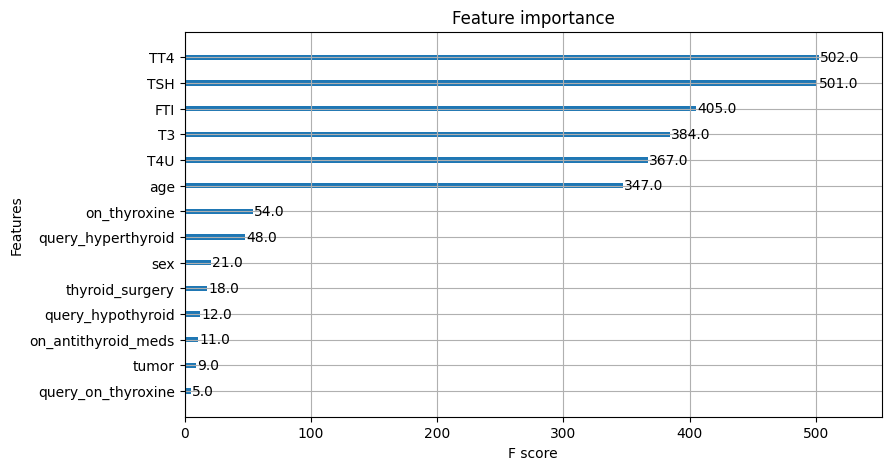

In [23]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(xgb_clf, ax=ax)
plt.show()

### 

# Building Predictive System

In [24]:
test_query=X_test.iloc[59].values.reshape(1,-1)

In [25]:
test_query

array([[20. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  1.6, 63. ,  1. , 63. ]])

In [26]:
result=xgb_clf.predict(test_query)
print(result)

if result==0:
    print('negative')
elif result==1:
    print('hypothyroid')
else:
    print('hyperthyroid')

[0]
negative


### 

# Pickle Model

In [27]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(xgb_clf,f)

In [28]:
with open('model.pkl','rb') as f:
    model=pickle.load(f)

In [32]:
import numpy as np
from sklearn.impute import SimpleImputer


test = np.array([[2.3, 4.5, 1.2, 0.5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]])


assert test.shape[1] == 21, f"Expected 21 features, but got {test.shape[1]}"


output = model.predict(test)


diagnoses = {
    0: 'negative',
    1: 'hypothyroid',
    2: 'hyperthyroid'
}
prediction = diagnoses.get(output[0])
print(prediction)


negative
